# Exploration and analysis of car sales


See below an analysis of listed used car sales. This notebook shows some steps taken to clean up and resolve data errors and then explores the relation between the manufacturer, number of miles on the car, transmission type, and price.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy.stats import pearsonr
from scipy.stats import f_oneway


In [2]:
#
df = pd.read_csv('vehicles_us.csv')

In [3]:
#Get a column for the manufacturer
df['manufacturer']= df['model'].apply(lambda x: x.split()[0])

In [4]:
#preview the data set
#I see some missing values, I will fill them in by median, mean, and 'missing' or 'no info', deppending on the column.
df.sample(20)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,manufacturer
18069,16500,2014.0,ford econoline,good,8.0,gas,NaN,automatic,van,white,NaN,2019-01-26,109,ford
15450,6995,2005.0,chevrolet tahoe,good,8.0,gas,138779.0,automatic,SUV,white,1.0,2018-07-11,50,chevrolet
24274,21499,2011.0,ford f-250 sd,good,NaN,gas,NaN,automatic,truck,silver,1.0,2018-12-06,18,ford
36013,7450,2013.0,nissan sentra,good,4.0,gas,71144.0,automatic,sedan,grey,NaN,2018-06-22,19,nissan
3866,5250,2012.0,chevrolet malibu,excellent,4.0,gas,98000.0,automatic,sedan,NaN,NaN,2018-08-09,44,chevrolet
50945,3900,2008.0,ford escape,good,4.0,gas,179778.0,automatic,SUV,brown,1.0,2018-07-29,109,ford
9767,19995,2003.0,ram 2500,like new,NaN,diesel,163951.0,manual,truck,white,1.0,2018-07-13,69,ram
5600,5250,2010.0,nissan rogue,excellent,4.0,gas,NaN,automatic,SUV,NaN,1.0,2019-01-05,19,nissan
5435,15990,2012.0,ford f-250 sd,good,8.0,gas,113419.0,automatic,truck,white,1.0,2019-01-15,44,ford
39988,5995,2005.0,ford f-150,good,8.0,gas,144000.0,automatic,truck,silver,1.0,2019-02-15,85,ford


In [5]:
#Fill the missing odometer values with the average odometer values in the rest of the column
df['odometer'] = df['odometer'].fillna(df['odometer'].mean())
df.sample(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,manufacturer
28307,3999,2002.0,chevrolet camaro,good,6.0,gas,114605.000000,automatic,coupe,black,NaN,2018-11-23,6,chevrolet
40336,8000,2004.0,jeep wrangler,good,6.0,gas,115553.461738,manual,SUV,yellow,1.0,2018-11-25,45,jeep
21103,8995,2010.0,ford edge,excellent,6.0,gas,87217.000000,automatic,SUV,blue,NaN,2018-08-29,75,ford
30503,9800,2003.0,ram 2500,excellent,8.0,gas,155000.000000,manual,pickup,white,1.0,2019-02-21,38,ram
36285,5995,2000.0,honda cr-v,excellent,4.0,gas,121500.000000,automatic,SUV,black,1.0,2019-02-01,96,honda


In [6]:
#fill the `is_4wd` column missing values with the string 'missing'
df['is_4wd'] = df['is_4wd'].fillna('missing')

In [7]:
#fill the `paint_color` column missing values with the string 'no info'
df['paint_color'] = df['paint_color'].fillna('no info')


In [8]:
#For missing values in `model_year`, we will use median so that the listed year is a whole integer, not a floating number.
df['model_year'] = df['model_year'].fillna(df['model_year'].median())

In [9]:
#Fill the `cylinders` column with the median value of the column. 
df['cylinders'] = df['cylinders'].fillna(df['cylinders'].median())

In [10]:
#we see that some of these columns are listed as 'objects' but we could benefit by listing them as categories and datetimes.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  object 
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
 13  manufacturer  51525 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 5.5+ MB


<div class='alert alert-info'>
    
Updating the following columns to 'category' data type
    -`manufacturer`
    -`cylinders`
    -`is_4wd`
    -`transmission`
    -`fuel`
    
 
Updating `date_posted` to be a datetime data type
    
Updating `model_year` to be an int data type

In [11]:
df['manufacturer'] = df['manufacturer'].astype('category')


In [12]:
df['cylinders'] = df['cylinders'].astype('category')

In [13]:
df['is_4wd'] = df['is_4wd'].astype('category')

In [14]:
df['transmission'] = df['transmission'].astype('category')

In [15]:
df['fuel'] = df['fuel'].astype('category')

In [16]:
df['model_year'] = df['model_year'].astype('int')

In [57]:
df['date_posted'] = pd.to_datetime (df['date_posted'], format='%Y-%m-%d')

In [18]:
df.sample(20)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,manufacturer
8418,7495,2007,honda odyssey,good,6.0,gas,97349.000000,automatic,van,custom,missing,2018-09-17,38,honda
47514,7500,2013,toyota prius,excellent,4.0,gas,115000.000000,automatic,hatchback,red,missing,2018-11-24,42,toyota
22452,8250,2015,nissan altima,like new,6.0,gas,92000.000000,automatic,sedan,black,missing,2018-09-15,2,nissan
15144,8950,2014,dodge charger,like new,6.0,gas,129133.000000,automatic,sedan,black,missing,2019-01-04,70,dodge
4133,16000,2014,chevrolet camaro lt coupe 2d,good,6.0,gas,73289.000000,other,coupe,black,missing,2018-09-07,36,chevrolet
2530,24990,2006,ford f-350 sd,good,8.0,gas,65603.000000,automatic,truck,red,1.0,2018-10-20,36,ford
30527,6495,2007,ford edge,excellent,6.0,gas,148868.000000,automatic,SUV,red,1.0,2018-06-05,31,ford
40733,15995,2011,ford f350 super duty,excellent,8.0,other,93285.000000,automatic,truck,white,missing,2018-06-15,61,ford
28761,3999,2007,toyota camry le,good,4.0,gas,145100.000000,automatic,sedan,black,missing,2018-06-14,28,toyota
21849,10000,2003,ford f-250,good,8.0,diesel,238800.000000,automatic,pickup,white,1.0,2018-11-28,34,ford


In [19]:
#find the average miles per manufacturer
df_avg_miles= df.groupby(['manufacturer'])['odometer'].mean().reset_index(name='avg_miles')
print(df_avg_miles)


     manufacturer      avg_miles
0           acura  138725.509156
1             bmw  113552.423250
2           buick  113807.216894
3        cadillac  122189.268072
4       chevrolet  112085.306475
5        chrysler  110189.965976
6           dodge  112215.214432
7            ford  116960.082369
8             gmc  125066.993594
9           honda  124774.072780
10        hyundai  106445.304905
11           jeep  111365.372759
12            kia   97829.006873
13  mercedes-benz  115553.461738
14         nissan   93991.375871
15            ram  121450.149076
16         subaru  120584.094914
17         toyota  125702.844177
18     volkswagen  102957.805462


In [20]:
#find the average price per manufacturer
df_avg_price = df.groupby('manufacturer')['price'].mean().reset_index(name='avg_price')
df_avg_price.head()

,manufacturer,avg_price
0,acura,6474.500000
1,bmw,10695.891386
2,buick,11439.612546
3,cadillac,17032.059006
4,chevrolet,14333.427104


In [21]:
#cost & price by manufacturer
cost_n_price = df_avg_miles.merge(df_avg_price, on=['manufacturer'], how='outer')
print(cost_n_price)

     manufacturer      avg_miles     avg_price
0           acura  138725.509156   6474.500000
1             bmw  113552.423250  10695.891386
2           buick  113807.216894  11439.612546
3        cadillac  122189.268072  17032.059006
4       chevrolet  112085.306475  14333.427104
5        chrysler  110189.965976   8182.738663
6           dodge  112215.214432   8067.058167
7            ford  116960.082369  12697.651989
8             gmc  125066.993594  15602.340622
9           honda  124774.072780   7317.624103
10        hyundai  106445.304905   7256.994885
11           jeep  111365.372759  12774.383420
12            kia   97829.006873   8616.570940
13  mercedes-benz  115553.461738  34900.000000
14         nissan   93991.375871   9346.470387
15            ram  121450.149076  18183.618818
16         subaru  120584.094914   8732.718553
17         toyota  125702.844177  10097.875115
18     volkswagen  102957.805462   7257.406214


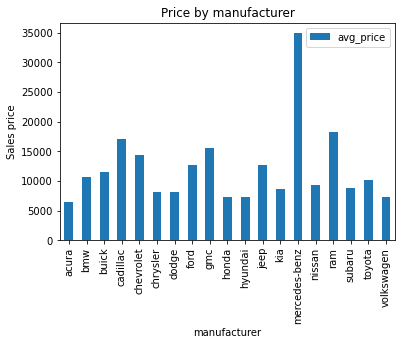

In [22]:
#Visualize the variance in price and miles
#px.scatter(cost_n_price, x=cost_n_price[2], y=cost_n_price[3])
#cost_n_price.plot(x='avg_miles', y='avg_price')


cost_n_price.plot(
    title='Price by manufacturer',
    x='manufacturer',
    y='avg_price',
    
    ylabel='Sales price',
    kind='bar'
)
#cost_n_price.set_xticklabels(["one", "two", "three", "four"], rotation=45)

plt.show()


<div class='alert alert-info'>
    
The mercedes benz has a much higher average price than the other manufactuers in this for-sale list. 
    
Excluding Cadillac, GMC, Jeep, Chevrolet, and Ram all have a noticably higher selling price.   

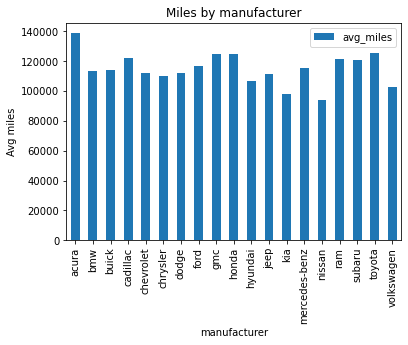

In [23]:
cost_n_price.plot(
    title='Miles by manufacturer',
    x='manufacturer',
    y='avg_miles',
    
    ylabel='Avg miles',
    kind='bar'


)
plt.show()

<div class='alert alert-info'>


It appears that the other manufacturers with lower average miles are more likely to have a higher average sales price.

Maybe the different in car prices are driven by the amount of miles and not the manufacturer. Before running any tests, we will look at a scatter plot of all of them to look for a visual cue.

In [24]:
#see the relationship of price and cars across all items for sale.
#Most cars seem to have less miles and cost under $50k

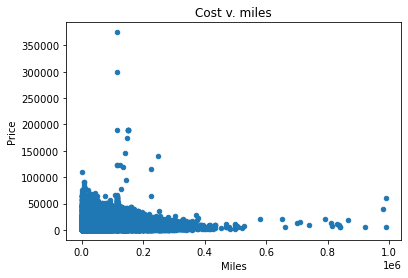

In [25]:
df.plot(title='Cost v. miles', 
        y='price', 
        x='odometer',
        ylabel='Price',
        xlabel='Miles',
        kind='scatter'
       
       )
plt.show()

<div class='alert alert-info'>
There does not appear to be too notable of a correlation between cost and miles. 

In [26]:
print(df['price'].corr(df['odometer']))

-0.3852965267274277


In [27]:
pearsonr(df['price'], df['odometer'])



(-0.3852965267274276, 0.0)

<div class='alert alert-info'>
    
There appears to be a negative correlation between cost and the number of miles. 
      

In [28]:
df_manufacturer_count = df.groupby('manufacturer').count().reset_index()
df_manufacturer_count

,manufacturer,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,acura,236,236,236,236,236,236,236,236,236,236,236,236,236
1,bmw,267,267,267,267,267,267,267,267,267,267,267,267,267
2,buick,271,271,271,271,271,271,271,271,271,271,271,271,271
3,cadillac,322,322,322,322,322,322,322,322,322,322,322,322,322
4,chevrolet,10611,10611,10611,10611,10611,10611,10611,10611,10611,10611,10611,10611,10611
5,chrysler,838,838,838,838,838,838,838,838,838,838,838,838,838
6,dodge,1255,1255,1255,1255,1255,1255,1255,1255,1255,1255,1255,1255,1255
7,ford,12672,12672,12672,12672,12672,12672,12672,12672,12672,12672,12672,12672,12672
8,gmc,2378,2378,2378,2378,2378,2378,2378,2378,2378,2378,2378,2378,2378
9,honda,3485,3485,3485,3485,3485,3485,3485,3485,3485,3485,3485,3485,3485


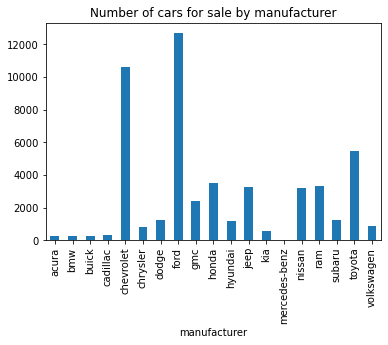

In [29]:
df_manufacturer_count.plot(title='Number of cars for sale by manufacturer',
                           x='manufacturer',
                           y='price',
                           kind='bar',
                           legend=False
                          
                          
                          )

plt.show()

In [30]:
#exploring to see if transmission has an impact on the car costs
df_transmission = df.groupby('transmission')['price'].mean().reset_index(name='avg_price')

df_transmission

,transmission,avg_price
0,automatic,12055.934139
1,manual,9887.836691
2,other,17672.877369


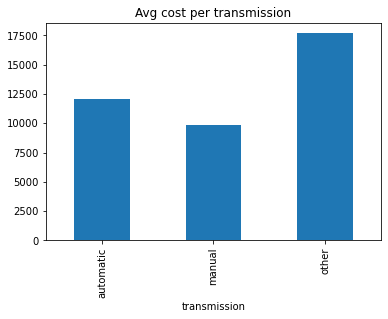

In [31]:
df_transmission.plot(
    title='Avg cost per transmission',
    x='transmission',
    y='avg_price',
    kind='bar',
    legend=False
)
plt.show()

<div class='alert alert-info'>
    
Automatic transmissions apear to cost, on average, significanly more than manual cars. Cars with'other' types of transmissions have a higher average cost than automatic or manual. 


In [32]:
df_tranny = df.groupby('transmission').count().reset_index()
df_tranny

,transmission,price,model_year,model,condition,cylinders,fuel,odometer,type,paint_color,is_4wd,date_posted,days_listed,manufacturer
0,automatic,46902,46902,46902,46902,46902,46902,46902,46902,46902,46902,46902,46902,46902
1,manual,2829,2829,2829,2829,2829,2829,2829,2829,2829,2829,2829,2829,2829
2,other,1794,1794,1794,1794,1794,1794,1794,1794,1794,1794,1794,1794,1794


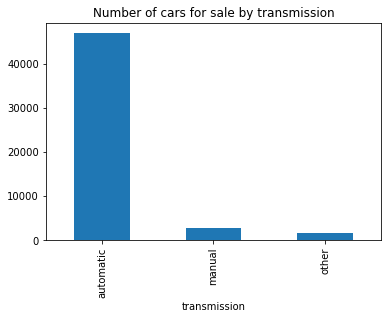

In [33]:
df_tranny.plot(
    title='Number of cars for sale by transmission',
    x='transmission',
    y='price',
    legend=False,
    kind='bar'
)
plt.show()

Because there are so many more automatic cars for sale, the manual and other car types are underrepresented.

In [34]:
df_tranny = df.groupby('transmission')['model_year'].mean().reset_index()
df_tranny

,transmission,model_year
0,automatic,2009.947337
1,manual,2005.082008
2,other,2014.486065


<div class='alert alert-info'>
    
I thought perhaps that the 'other' transmission types could be antique, collectible type of cars, but it appears that they all have a relatively similar model_year.
    

## Conclusion
There is a significantly higher amount of Chevys, Fords, and Toyotas for sale than any of the others. Kia, Acura, BMW, Buic, and Cadillac all have much less cars for sale. 

Of all the cars for sale, having less miles on the car is more likely to be correlated with a higher price. 

While the 'other' transmission types have a higher price than the automatic and manual cars, there is a low representation of 'other' transmission types making conclusions difficult to draw. There would be value in learning what the 'other' data types are. 

Similarly, manual cars have a lower cost than automatic but there is a much lower amount of manual cars represented. There could be a lower desire in users to purchase manual cars, making them have a lower average list price.